In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import os
import json

# Bumpy road code metrics

Extract values from file

In [6]:
data = {}

i = 1    
for filename in os.listdir("./"):
    if filename.endswith(".json") and filename != "commit_data.json":  # Adjust for file format
        filepath = os.path.join("./", filename)
        with open(filepath, "r") as file:
            json_object = json.load(file)
            projects = [{"project_id": key, **value} for key, value in json_object.items()]
            for project in projects:
                match = re.search(r"(\d+)\s+BR001", project["bumpy_analysis"])
                if match:
                    score = int(match.group(1))
                    project_id = project["project_id"]
                    if project_id not in data:
                        data[project_id] = {}
                    milestone = "Milestone " + str(i)
                    data[project_id][milestone] = score
        i += 1

print(data)


{'993': {'Milestone 1': 21, 'Milestone 2': 21, 'Milestone 3': 21}, '989': {'Milestone 1': 18, 'Milestone 2': 18, 'Milestone 3': 18}, '899': {'Milestone 1': 5, 'Milestone 2': 5, 'Milestone 3': 5}, '898': {'Milestone 1': 7, 'Milestone 2': 7, 'Milestone 3': 7}, '897': {'Milestone 1': 1, 'Milestone 2': 1, 'Milestone 3': 1}, '842': {'Milestone 1': 8, 'Milestone 2': 8, 'Milestone 3': 8}, '1004': {'Milestone 1': 6, 'Milestone 2': 6, 'Milestone 3': 6}, '1002': {'Milestone 1': 2, 'Milestone 2': 2, 'Milestone 3': 2}, '922': {'Milestone 1': 4, 'Milestone 2': 4, 'Milestone 3': 4}, '854': {'Milestone 1': 6, 'Milestone 2': 6, 'Milestone 3': 6}, '858': {'Milestone 1': 8, 'Milestone 2': 8, 'Milestone 3': 8}, '857': {'Milestone 1': 11, 'Milestone 2': 11, 'Milestone 3': 11}, '948': {'Milestone 1': 8, 'Milestone 2': 8, 'Milestone 3': 8}, '947': {'Milestone 1': 4, 'Milestone 2': 4, 'Milestone 3': 4}, '971': {'Milestone 1': 11, 'Milestone 2': 11, 'Milestone 3': 11}, '967': {'Milestone 1': 3, 'Milestone 2':

Convert data

In [7]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.sort_index()

## Plot data
### Bar chart

<Figure size 1000x500 with 0 Axes>

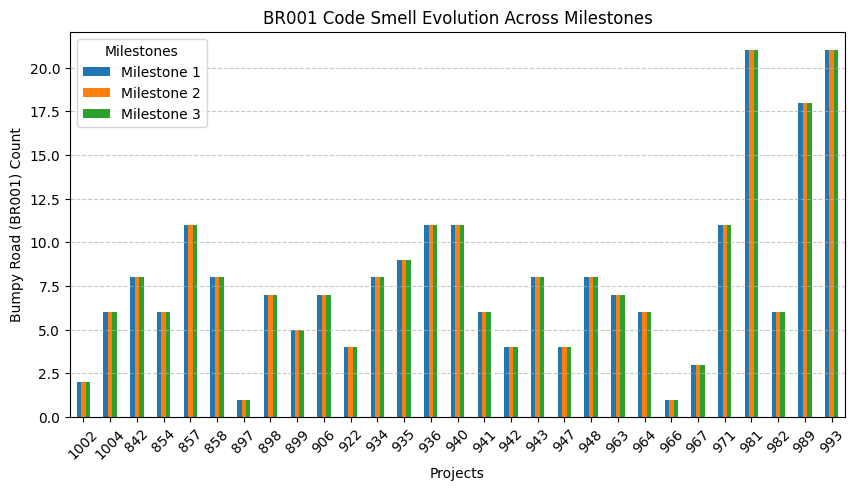

In [8]:
# Plot
plt.figure(figsize=(10, 5))
df.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Bumpy Road (BR001) Count")
plt.title("BR001 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

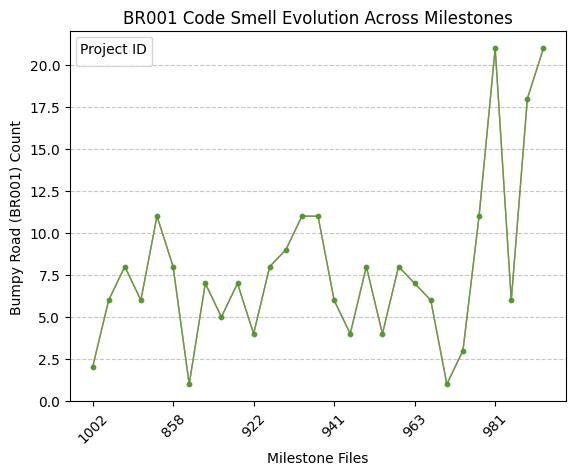

In [9]:
# Plot
plt.figure(figsize=(12, 6))
df.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Bumpy Road (BR001) Count")
plt.title("BR001 Code Smell Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Heatmap

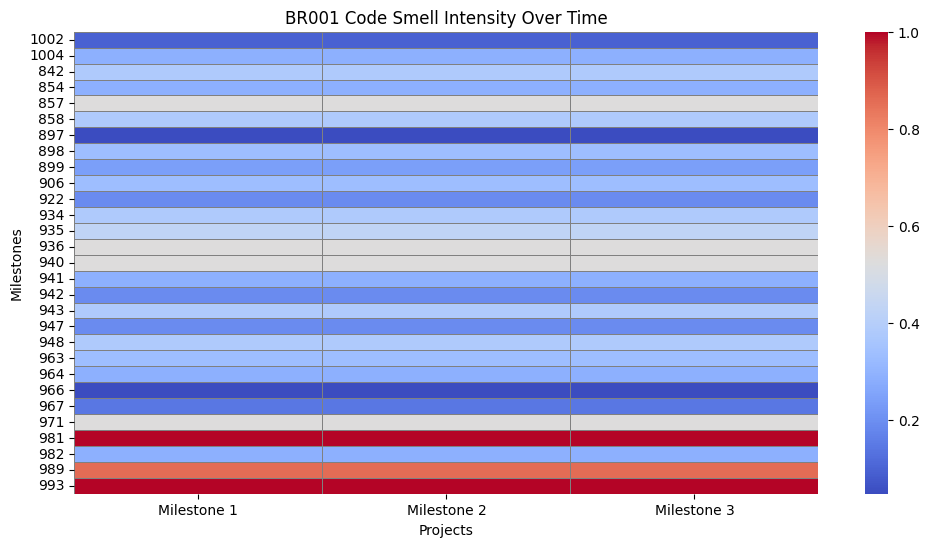

In [7]:
# Normalize values to improve visualization
df_normalized = df / df.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Milestones")
plt.title("BR001 Code Smell Intensity Over Time")

# Show plot
plt.show()

### Line chart 2

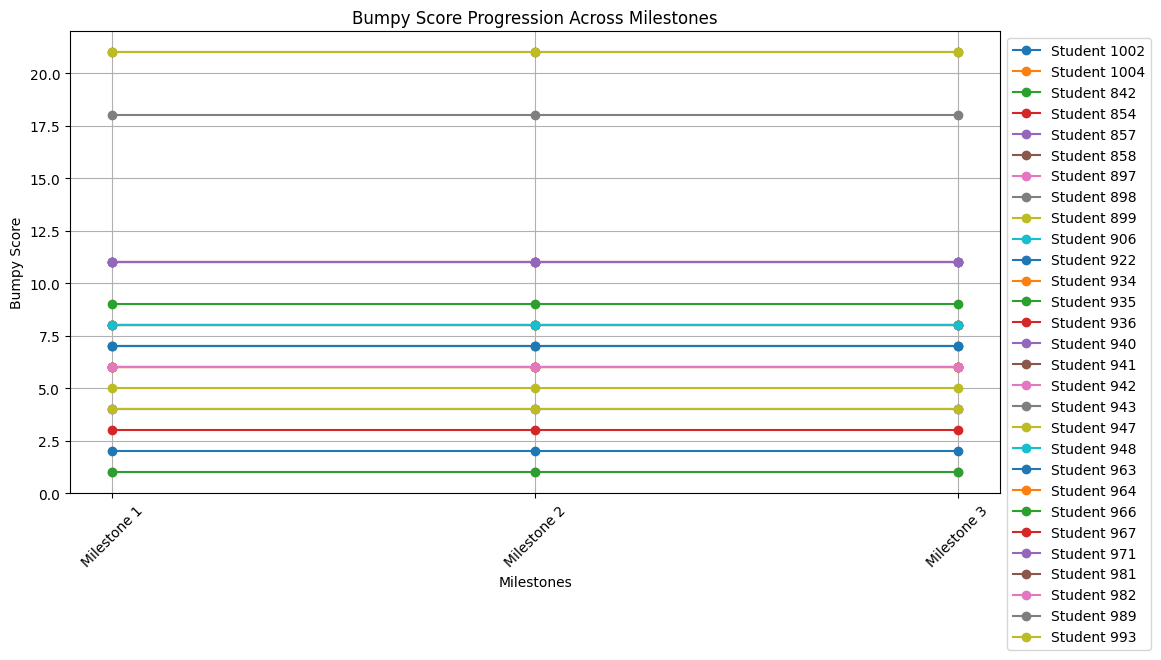

In [8]:
plt.figure(figsize=(12, 6))

for student_id, scores in df.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Student {student_id}")

plt.xlabel("Milestones")
plt.ylabel("Bumpy Score")
plt.title("Bumpy Score Progression Across Milestones")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

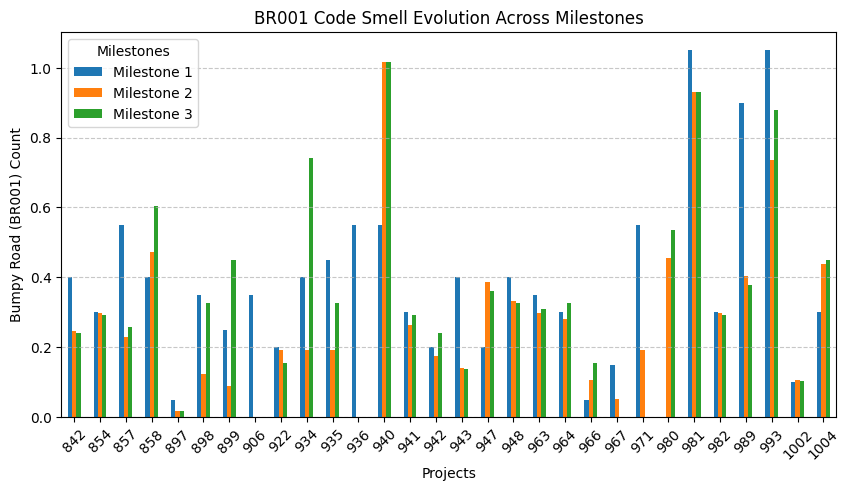

In [9]:
df = df / (df.max() - df.min())

# Plot
plt.figure(figsize=(10, 5))
df.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Bumpy Road (BR001) Count")
plt.title("BR001 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

# Function parameter count

Extract values from file

In [10]:
data = {}

i = 1    
for filename in os.listdir("./"):
    if filename.endswith(".json"):  # Adjust for file format
        filepath = os.path.join("./", filename)
        with open(filepath, "r") as file:
            json_object = json.load(file)
            projects = [{"project_id": key, **value} for key, value in json_object.items()]
            for project in projects:
                match = re.search(r"(\d+)\s+FPC001", project["bumpy_analysis"])
                if match:
                    score = int(match.group(1))
                    project_id = project["project_id"]
                    if project_id not in data:
                        data[project_id] = {}
                    milestone = "Milestone " + str(i)
                    data[project_id][milestone] = score
        i += 1

print(data)

{993: {'Milestone 1': 1, 'Milestone 2': 3, 'Milestone 3': 3}, 989: {'Milestone 1': 6, 'Milestone 2': 6, 'Milestone 3': 6}, 948: {'Milestone 1': 1, 'Milestone 2': 2, 'Milestone 3': 2}, 964: {'Milestone 1': 1, 'Milestone 2': 1, 'Milestone 3': 1}, 981: {'Milestone 1': 2, 'Milestone 2': 2, 'Milestone 3': 2}, 858: {'Milestone 2': 1, 'Milestone 3': 2}, 947: {'Milestone 2': 3, 'Milestone 3': 3}, 941: {'Milestone 2': 1, 'Milestone 3': 1}, 982: {'Milestone 2': 4, 'Milestone 3': 4}, 980: {'Milestone 2': 2, 'Milestone 3': 2}, 898: {'Milestone 3': 1}, 934: {'Milestone 3': 2}, 942: {'Milestone 3': 1}}


Convert data

In [11]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.sort_index()

### Bar chart

<Figure size 1000x500 with 0 Axes>

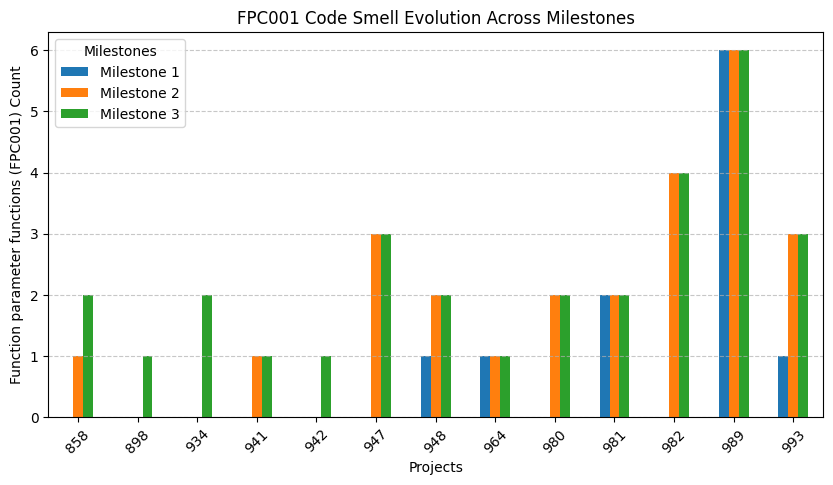

In [12]:
# Plot
plt.figure(figsize=(10, 5))
df.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Function parameter functions (FPC001) Count")
plt.title("FPC001 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()